In [35]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
# libraries
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
import seaborn as sns

In [37]:
processed_data = pd.read_parquet("/mnt/c/Users/Florian/Desktop/Uni/MSc/FoPr/preprocessed_pcp_data.parquet")
processed_data.head()

,modified_sequence,precursor_charge,precursor_intensity,charge_by_max_intensity,max_intensity,charge_by_avg_intensity,avg_intensity,one_hot_most_abundant_charge,charge_state_vector,normalized_intensity_distribution
0,AAAAAAAAAAAAAAAAGLGLGP,"[2, 3, 2, 1, 1, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, ...","[12746190.0, 2009914.0, 12746190.0, 791369.9, ...",2,84118390.0,2,4.312718e+07,"[0, 1, 0, 0, 0, 0]","[1, 1, 1, 0, 0, 0]","[0.0014942136737631886, 0.977159622342211, 0.0..."
1,AAAAAAAAAAAAAAAASAGGK,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[5944787.0, 5944787.0, 8502878.0, 6425294.0, 8...",2,8824163.0,2,7.635637e+06,"[0, 1, 0, 0, 0, 0]","[0, 1, 0, 0, 0, 0]","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]"
2,AAAAAAAAAAAAAAAGAGAGAK,"[2, 2, 2, 2]","[3067981.0, 3067981.0, 3067981.0, 3067981.0]",2,3067981.0,2,3.067981e+06,"[0, 1, 0, 0, 0, 0]","[0, 1, 0, 0, 0, 0]","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]"
3,AAAAAAAAAAAAAAASGFAYPGTSER,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3]","[11913300.0, 11913300.0, 11913300.0, 11913300....",2,11913300.0,2,8.273927e+06,"[0, 1, 0, 0, 0, 0]","[0, 1, 1, 0, 0, 0]","[0.0, 0.9879325512697509, 0.012067448730249095..."
4,AAAAAAAAAAAAAAG,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1573785.0, 4638296.0, 7934979.0, 2019978.0, 4...",1,16573010.0,1,8.562738e+06,"[1, 0, 0, 0, 0, 0]","[1, 0, 0, 0, 0, 0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]"


In [38]:
len(processed_data)

757820

## -----------------
# Data split Task 1
## -----------------

In [39]:
# Example DataFrame
df = processed_data.copy()

# Convert one-hot vectors to scalar class labels
def one_hot_to_class(label):
    """ Convert a one-hot encoded list or array to an integer representing the index of the max value. """
    if isinstance(label, str):
        label = np.array(eval(label))
    return np.argmax(label) +1

# Create a new column with scalar class labels
df['most_abundant_charge_label'] = df['one_hot_most_abundant_charge'].apply(one_hot_to_class)

# Now use the new scalar column for stratification
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['most_abundant_charge_label'])
train_df, val_df = train_test_split(train_df, test_size=0.25, stratify=train_df['most_abundant_charge_label'])

# Check distribution of the stratified column
print(train_df['most_abundant_charge_label'].value_counts())
print(val_df['most_abundant_charge_label'].value_counts())
print(test_df['most_abundant_charge_label'].value_counts())

most_abundant_charge_label
2    239075
3    157747
4     33461
1     20484
5      3639
6       286
Name: count, dtype: int64
most_abundant_charge_label
2    79691
3    52582
4    11154
1     6828
5     1213
6       96
Name: count, dtype: int64
most_abundant_charge_label
2    79691
3    52583
4    11154
1     6828
5     1213
6       95
Name: count, dtype: int64


In [40]:
train_df.head()

,modified_sequence,precursor_charge,precursor_intensity,charge_by_max_intensity,max_intensity,charge_by_avg_intensity,avg_intensity,one_hot_most_abundant_charge,charge_state_vector,normalized_intensity_distribution,most_abundant_charge_label
536620,QDVAELM[UNIMOD:35]QWM[UNIMOD:35]EEK,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[7061449.0, 7061449.0, 1992338.0, 1992338.0, 1...",2,7061449.0,2,4.385582e+06,"[0, 1, 0, 0, 0, 0]","[0, 1, 0, 0, 0, 0]","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]",2
215516,FVFSLQAIPR,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[369135200.0, 68204920.0, 369135200.0, 8482136...",2,533817000.0,2,1.243925e+08,"[0, 1, 0, 0, 0, 0]","[0, 1, 0, 0, 0, 0]","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]",2
512303,PEADTLPRSGEQER,"[2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, ...","[10697430.0, 9202250.0, 436827700.0, 9202250.0...",3,436827700.0,3,1.631059e+08,"[0, 0, 1, 0, 0, 0]","[0, 1, 1, 0, 0, 0]","[0.0, 0.020166363258359753, 0.9798336367416403...",3
420352,LPLLIPTSKL,[2],[4061193.0],2,4061193.0,2,4.061193e+06,"[0, 1, 0, 0, 0, 0]","[0, 1, 0, 0, 0, 0]","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]",2
96493,DIIDYHSLTYDQMLNHYAK,"[3, 3, 4]","[164343700.0, 164343700.0, 47112030.0]",3,164343700.0,3,1.643437e+08,"[0, 0, 1, 0, 0, 0]","[0, 0, 1, 1, 0, 0]","[0.0, 0.0, 0.8746351744067308, 0.1253648255932...",3


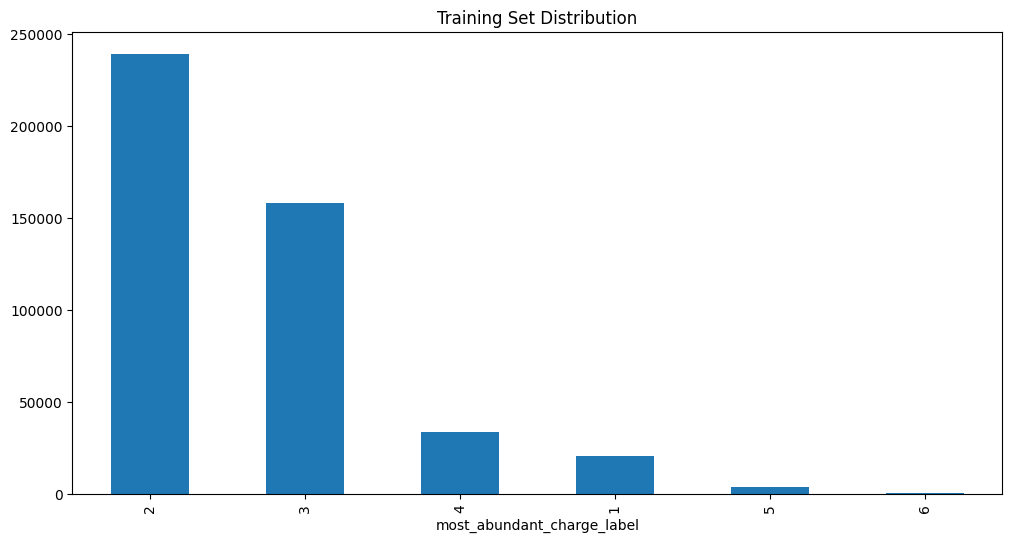

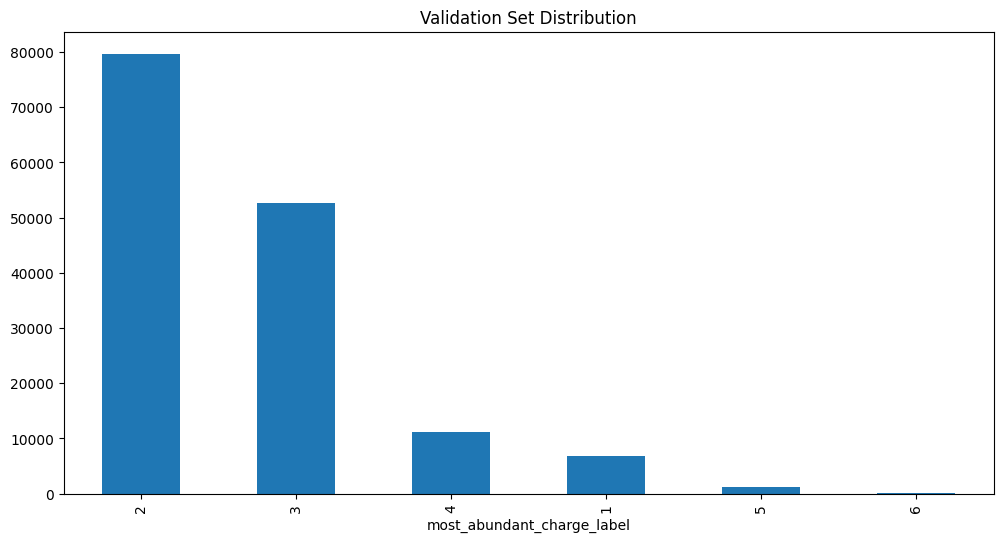

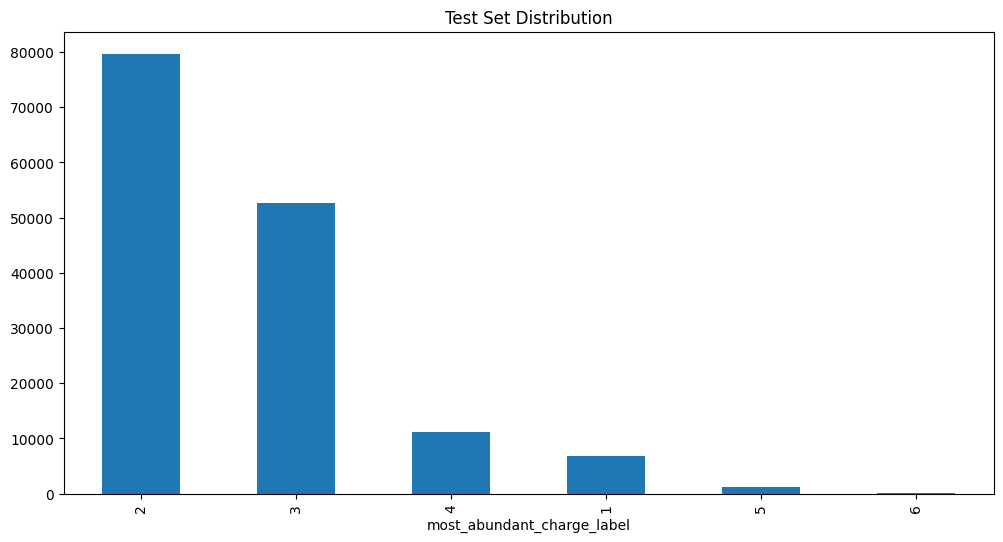

In [41]:
# Plot distribution for training set
plt.figure(figsize=(12, 6))
train_df['most_abundant_charge_label'].value_counts().plot(kind='bar')
plt.title('Training Set Distribution')
plt.show()

# Plot distribution for validation set
plt.figure(figsize=(12, 6))
val_df['most_abundant_charge_label'].value_counts().plot(kind='bar')
plt.title('Validation Set Distribution')
plt.show()

# Plot distribution for test set
plt.figure(figsize=(12, 6))
test_df['most_abundant_charge_label'].value_counts().plot(kind='bar')
plt.title('Test Set Distribution')
plt.show()

## -----------------
# Data split Task 2
## -----------------


Training Set Combinations:
Charge State Combination       Count
--------------------------------------------------
(0, 1, 0, 0, 0, 0)             195995
(0, 1, 1, 0, 0, 0)             111206
(0, 0, 1, 0, 0, 0)             56131
(1, 1, 0, 0, 0, 0)             26660
(0, 0, 1, 1, 0, 0)             22461
(1, 0, 0, 0, 0, 0)             16353
(0, 0, 0, 1, 0, 0)             11944
(0, 1, 1, 1, 0, 0)             7542
(0, 0, 0, 1, 1, 0)             2221
(0, 0, 1, 1, 1, 0)             1698
(0, 0, 0, 0, 1, 0)             1161
(0, 1, 1, 1, 1, 0)             266
(1, 1, 1, 0, 0, 0)             244
(0, 1, 0, 1, 0, 0)             203
(0, 0, 0, 0, 1, 1)             158
(0, 0, 0, 1, 1, 1)             140
(0, 0, 0, 0, 0, 1)             118
(0, 0, 1, 1, 1, 1)             81
(0, 0, 1, 0, 1, 0)             63
(0, 0, 0, 1, 0, 1)             13
(0, 1, 0, 1, 1, 0)             10
(1, 0, 1, 0, 0, 0)             5
(0, 0, 1, 1, 0, 1)             4
(0, 0, 1, 0, 1, 1)             4
(0, 1, 1, 1, 1, 1)             4
(

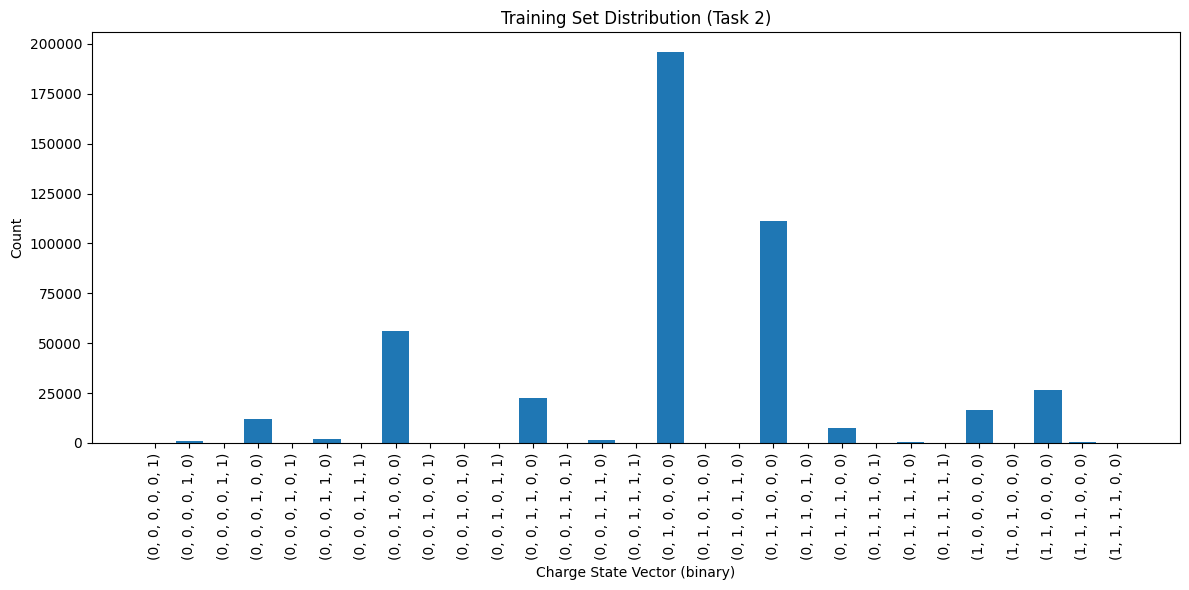

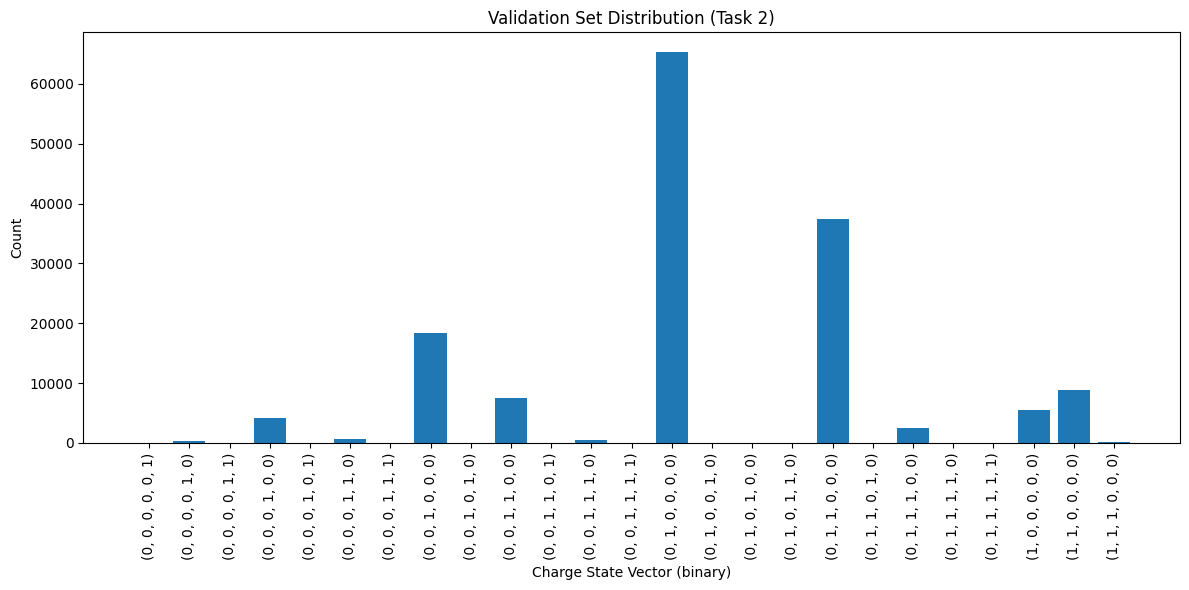

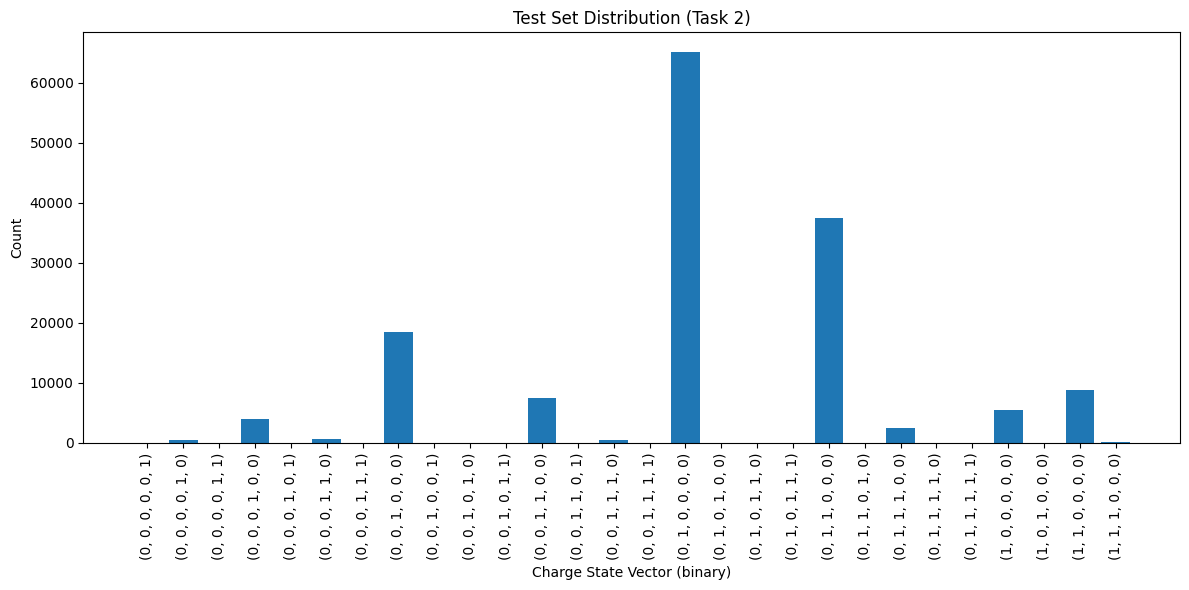

In [42]:
import ast
from collections import Counter
import matplotlib.pyplot as plt

# Convert a string representation to actual list
def literal_eval_list(col):
    return [int(x) for x in ast.literal_eval(col)]

# Count unique combinations for charge state vectors
def count_charge_states(df, col):
    # onvert lists or arrays to tuples for counting
    tuples = df[col].apply(lambda x: tuple(x))
    # Count occurrences
    return Counter(tuples)

# Visualize charge state vector distribution
def plot_distribution_with_labels(counter, title):
    labels, counts = zip(*sorted(counter.items()))
    label_strings = [str(label) for label in labels]

    plt.figure(figsize=(12, 6))
    plt.bar(range(len(counts)), counts, tick_label=label_strings)
    plt.xlabel("Charge State Vector (binary)")
    plt.ylabel("Count")
    plt.title(title)

    plt.xticks(rotation=90)
    plt.tight_layout()  # Prevent label overlap
    plt.show()

    
# Display observed combinations and their counts
def display_combinations_and_counts(counter):
    print("{:<30} {}".format("Charge State Combination", "Count"))
    print("-" * 50)
    for combination, count in sorted(counter.items(), key=lambda x: x[1], reverse=True):
        combination_str = str(combination)
        print(f"{combination_str:<30} {count}")

train_counter = count_charge_states(train_df, 'charge_state_vector')
val_counter = count_charge_states(val_df, 'charge_state_vector')
test_counter = count_charge_states(test_df, 'charge_state_vector')

print("\nTraining Set Combinations:")
display_combinations_and_counts(train_counter)

print("\nValidation Set Combinations:")
display_combinations_and_counts(val_counter)

print("\nTest Set Combinations:")
display_combinations_and_counts(test_counter)

train_counter = count_charge_states(train_df, 'charge_state_vector')
val_counter = count_charge_states(val_df, 'charge_state_vector')
test_counter = count_charge_states(test_df, 'charge_state_vector')

plot_distribution_with_labels(train_counter, "Training Set Distribution (Task 2)")
plot_distribution_with_labels(val_counter, "Validation Set Distribution (Task 2)")
plot_distribution_with_labels(test_counter, "Test Set Distribution (Task 2)")

## -----------------
# Data split Task 3
## -----------------

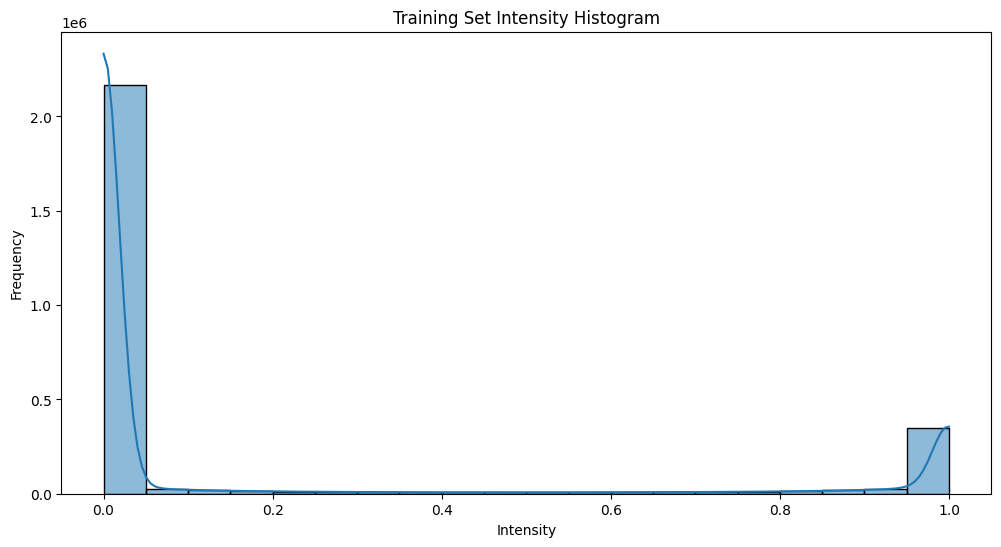

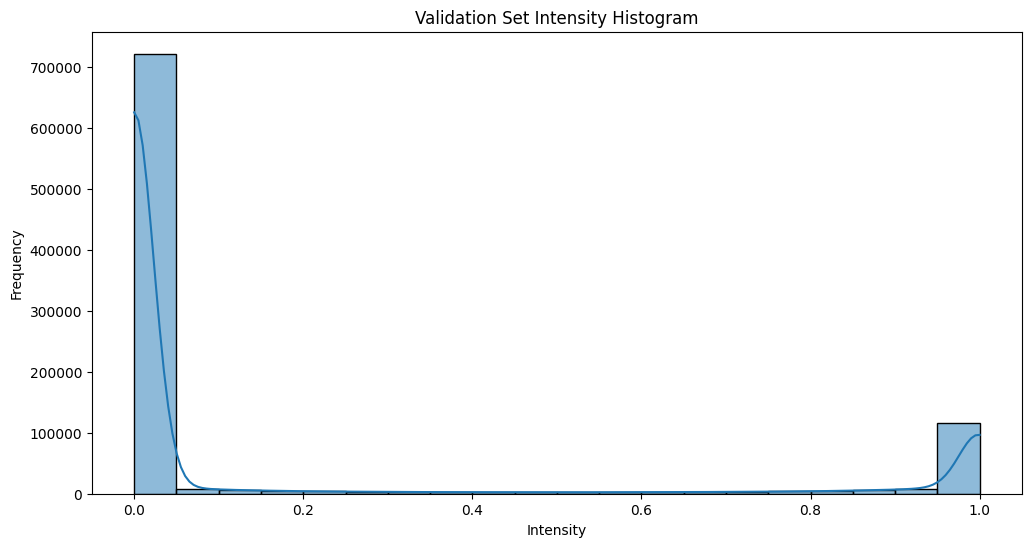

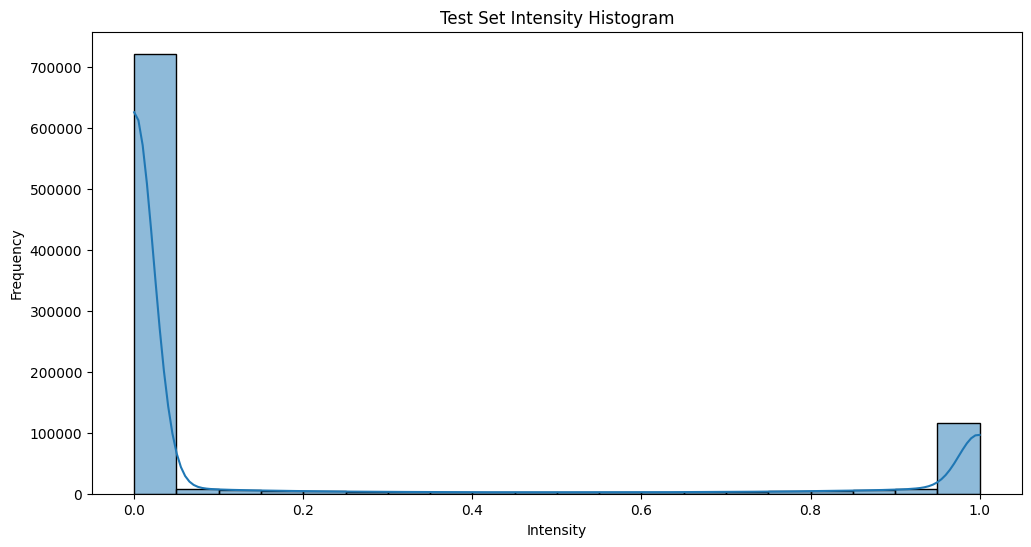

In [43]:
def array_to_list(val):
    if isinstance(val, (list, np.ndarray)):
        return list(val)
    return None

def plot_intensity_histogram(df, title):
    # Convert NumPy arrays to lists and parse
    df['parsed_intensity'] = df['normalized_intensity_distribution'].apply(array_to_list)
    parsed_values = df['parsed_intensity'].dropna().explode()
    plt.figure(figsize=(12, 6))
    sns.histplot(parsed_values, kde=True, bins=20)
    plt.xlabel("Intensity")
    plt.ylabel("Frequency")
    plt.title(title)
    plt.show()

plot_intensity_histogram(train_df, "Training Set Intensity Histogram")
plot_intensity_histogram(val_df, "Validation Set Intensity Histogram")
plot_intensity_histogram(test_df, "Test Set Intensity Histogram")